# Building a song recommender system

In [1]:
import turicreate

# Load some music data

In [2]:
song_data = turicreate.SFrame('song_data.sframe')

# Explore our data

In [3]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Show the most popular songs in the dataset

In [5]:
song_data['song'].show()

Materializing SArray

In [6]:
len(song_data)

1116609

# Count the number of unique users in the data

In [7]:
users = song_data['user_id'].unique()

In [8]:
len(users)

66346

# Create a song recommender

In [9]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [10]:
popularity_model = turicreate.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.397969s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [11]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [12]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Sehr kosmisch - Harmonia,4754.0,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Undo - Björk,4227.0,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,You're The One - DwightYoakam ...,3781.0,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Revelry - Kings Of Leon,3527.0,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Secrets - OneRepublic,3148.0,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Hey_ Soul Sister - Train,2538.0,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Tive Sim - Cartola,2521.0,10


# Build a recommender with personalization

In [13]:
personalized_model = turicreate.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.457616s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.097ms                        | 1.5        |

| 21.416ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 130.348ms                           | 0                | 0               |

| 512.478ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.5574s

## Apply personalized model to make song recommendations

In [14]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [15]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,There Goes My Baby -Usher ...,0.03319207429885864,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Panty Droppa [Intro](Album Version) - Trey ...,0.03185662031173706,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nobody (Featuring AthenaCage) (LP Version) - ...,0.027846765518188477,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Youth Against Fascism -Sonic Youth ...,0.026291418075561523,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nice & Slow - Usher,0.023963940143585206,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Making Love (Into TheNight) - Usher ...,0.023817694187164305,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Naked - Marques Houston,0.022892570495605467,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,I.nner Indulgence -DESTRUCTION ...,0.022076749801635744,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Love Lost (Album Version)- Trey Songz ...,0.020449769496917725,10


# Apply model to find similar songs in the data set

In [16]:
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [17]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [20]:

%matplotlib inline

model_performance = turicreate.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 27899.5

recommendations finished on 2000/2931 queries. users per second: 28873.4


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.02081200955305355  | 0.005656703507266456 |
|   2    | 0.02115319003752987  | 0.011201423202446735 |
|   3    | 0.01910610713067214  | 0.014706523432214333 |
|   4    | 0.01808256567724328  | 0.01873068456998859  |
|   5    | 0.017331968611395458 | 0.02238186961830771  |
|   6    | 0.01683157056749687  | 0.026200103963665917 |
|   7    | 0.016230443047229138 | 0.029171918910915865 |
|   8    | 0.015609007164790174 | 0.031568982592524046 |
|   9    | 0.014670760832480399 |  0.0338871144398268  |
|   10   | 0.014670760832480426 | 0.038619787468303315 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 25467.3

recommendations finished on 2000/2931 queries. users per second: 24983.1


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.022859092459911287 | 0.006385096763807101 |
|   2    | 0.020982599795291716 | 0.01251755750220438  |
|   3    | 0.01899238030251336  | 0.01630914102766714  |
|   4    | 0.01808256567724327  | 0.020180050246580445 |
|   5    | 0.016854315933128645 | 0.024395389287917454 |
|   6    | 0.01603548277038553  | 0.027422430672174807 |
|   7    | 0.015304381732222061 | 0.030459638545616056 |
|   8    | 0.014756055953599464 | 0.03365077149621674  |
|   9    | 0.01395049092080821  | 0.03579980238117392  |
|   10   | 0.013476629136813386 | 0.03793465433690612  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.

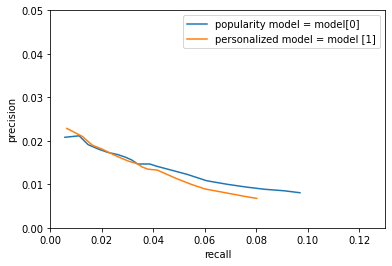

In [26]:
import matplotlib.pyplot as plt
#%matplotlib inline
# model_performance[0] --> calls the first model in model_performance
# model_performance[1] --> calls the second model in model_performance
# 'precision_recall_overall' --> this is the "table" within performance_model ...
# ... with 18 rows each
# plt.scatter maybe replace by plt.plot to get a line
plt.plot(model_performance[0]['precision_recall_overall']['recall'],
             model_performance[0]['precision_recall_overall']['precision'],
             label= "popularity model = model[0]")
plt.plot(model_performance[1]['precision_recall_overall']['recall'],
             model_performance[1]['precision_recall_overall']['precision'],
             label='personalized model = model [1]')
#plt.plot([0, .25], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, .13]) # defines width of x-axis
plt.ylim([0.0, .05]) # defines height of y-axis
plt.xlabel('recall') # labels the x-axis
plt.ylabel('precision') # labels the y-axis
plt.legend() # adds the legend according to labels above in plt.plot(model.....)
plt.show()

## unique users

In [27]:
artists = ['Kanye West', 'Foo Fighters', 'Taylor Swift', 'Lady GaGa']

In [28]:
for artist in artists:
    song_data_for_artist = song_data[song_data['artist'] == artist]
    users_for_artist = song_data_for_artist['user_id'].unique()
    print(artist + ': ' + str(len(users_for_artist)))

Kanye West: 2522
Foo Fighters: 2055
Taylor Swift: 3246
Lady GaGa: 2928


In [29]:
grouped = song_data.groupby(key_column_names='artist', operations={'total_count': turicreate.aggregate.SUM('listen_count')})

In [31]:
grouped.sort('total_count',ascending=False)

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184


In [32]:
grouped.sort('total_count')

artist,total_count
William Tabbert,14
Reel Feelings,24
Beyoncé feat. Bun B andSlim Thug ...,26
Diplo,30
Boggle Karaoke,30
harvey summers,31
Nâdiya,36
Kanye West / Talib Kweli/ Q-Tip / Common / ...,38
Jody Bernal,38
Aneta Langerova,38


## Using groupby-aggregate to find the most recommended songs

In [37]:

subset_test_users = test_data['user_id'].unique()[0:10000]

In [39]:
personalized_model.recommend(subset_test_users,k=1)

recommendations finished on 1000/10000 queries. users per second: 15724

recommendations finished on 2000/10000 queries. users per second: 18117.1

recommendations finished on 3000/10000 queries. users per second: 19390.7

recommendations finished on 4000/10000 queries. users per second: 21067

recommendations finished on 5000/10000 queries. users per second: 22345

recommendations finished on 6000/10000 queries. users per second: 23261.3

recommendations finished on 7000/10000 queries. users per second: 24006.7

recommendations finished on 8000/10000 queries. users per second: 24752.5

recommendations finished on 9000/10000 queries. users per second: 25128.5

recommendations finished on 10000/10000 queries. users per second: 24138.7

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.01702657767704555,1
532e98155cbfd1e1a474a28ed96e59e50f7c5baf ...,Jive Talkin' (AlbumVersion) - Bee Gees ...,0.011828865323747908,1
18325842a941bc58449ee71d659a08d1c1bd2383 ...,Goodnight And Goodbye -Jonas Brothers ...,0.015925798565149307,1
507433946f534f5d25ad1be302edb9a2376f503c ...,Find The Cost Of Freedom- Crosby_ Stills_ Nash & ...,0.016580658930319327,1
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Rabbit Heart (Raise ItUp) - Florence + The ...,0.07993997260928154,1
fe85b96ba1983219b296f6b4869dd29eb2b72ff9 ...,Secrets - OneRepublic,0.07888271411259969,1
225ea420b4bede50919d1bfe24a599691522d176 ...,Clocks - Coldplay,0.027103025179642897,1
95dc7e2b188b1148b2d25f4e6b6e94afacc4efc3 ...,Bust a Move - InfectedMushroom ...,0.05347385406494141,1
4a3a1ae2748f12f7ab921a47d6d79abf82e3e325 ...,Isis (Spam Remix) -Alaska Y Dinarama ...,0.041803021180002314,1


In [40]:
grouped = song_data.groupby(key_column_names='song', operations={'count': turicreate.aggregate.COUNT()})

In [41]:
grouped.sort('count',ascending=False)

song,count
Sehr kosmisch - Harmonia,5970
Undo - Björk,5281
You're The One - DwightYoakam ...,4806
Dog Days Are Over (RadioEdit) - Florence + The ...,4536
Revelry - Kings Of Leon,4339
Horn Concerto No. 4 in Eflat K495: II. Romance ...,3949
Secrets - OneRepublic,3916
Tive Sim - Cartola,3185
Fireflies - CharttraxxKaraoke ...,3171
Hey_ Soul Sister - Train,3132
